In [1]:
from formulation import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./formulation/data/FDA_APPROVED.csv")

In [3]:
NEEDED = ['% Excreted Unchanged in Urine', 'CLogP', 'HBA', 'HBD', 'PSA', 'Formulation']
INPUTS = NEEDED[:-1]
OUTPUT = NEEDED[-1]

In [4]:
clean_data = predict_missing_value.data_dropna(data, NEEDED, NEEDED)
train, test = train_test_split(clean_data, test_size=0.15)

In [5]:
model = classification.predict(train[INPUTS], train[OUTPUT])
model.score(test[INPUTS], test[OUTPUT])

Accuracy: 0.6818181818181818

 Feature Importance 
 CLogP                            0.285292
PSA                              0.278544
% Excreted Unchanged in Urine    0.200768
HBA                              0.135005
HBD                              0.100392
dtype: float64

 Classicifation report
               precision    recall  f1-score   support

    capsules       0.20      0.11      0.14         9
    solution       0.67      0.31      0.42        13
     tablets       0.73      0.91      0.81        44

    accuracy                           0.68        66
   macro avg       0.53      0.44      0.46        66
weighted avg       0.64      0.68      0.64        66

The predict Classicifation for all 
 ['tablets' 'tablets' 'solution' 'tablets' 'tablets' 'solution' 'solution'
 'solution' 'tablets' 'tablets' 'tablets' 'tablets' 'tablets' 'tablets'
 'tablets' 'tablets' 'capsules' 'tablets' 'tablets' 'tablets' 'tablets'
 'tablets' 'tablets' 'tablets' 'tablets' 'tablets' 'tablets' '

0.7413793103448276

In [6]:
predict.predict(model, test[INPUTS])

array(['tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'solution', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'solution', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'solution', 'tablets', 'tablets', 'tablets', 'solution', 'tablets',
       'tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'tablets', 'tablets', 'tablets', 'capsules', 'tablets',
       'tablets', 'tablets', 'tablets', 'tablets', 'capsules', 'solution',
       'tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'solution', 'tablets', 'solution', 'tablets', 'tablets',
       'solution', 'solution', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'capsules', 'tablets', 'tablets', 'solution', 'tablets',
       'tablets', 'solution', 'tablets

In [7]:
NEEDED = ['MW Drug', 'MW Sol', 'CLogP', 'HBA', 'HBD', 'PSDA', 'ALOGPS 2.1 solubility', 'Measured LogD74']
INPUTS = NEEDED[:-1]
OUTPUT = NEEDED[-1]

filled_data = predict_missing_value.fill_missing_value(data, NEEDED, INPUTS, OUTPUT)


NEEDED = ['MW Drug', 'MW Sol', 'CLogP', 'HBA', 'HBD', 'PSDA', 'ALOGPS 2.1 solubility', 'Measured LogS (molar)']
INPUTS = NEEDED[:-1]
OUTPUT = NEEDED[-1]

filled_data = predict_missing_value.fill_missing_value(filled_data, NEEDED, INPUTS, OUTPUT)

Coefficient of determination on testing set: 0.49
Mean squared error on testing set: 3.06
Coefficient of determination on testing set: 0.28
Mean squared error on testing set: 2.45


In [8]:
NEEDED = ['% Excreted Unchanged in Urine', 'CLogP', 'Measured LogD74', 'Measured LogS (molar)', 'PSA', 'Formulation']
INPUTS = NEEDED[:-1]
OUTPUT = NEEDED[-1]

clean_data = predict_missing_value.data_dropna(filled_data, NEEDED, NEEDED)
clean_data.shape

(766, 6)

In [9]:
classification.predict(clean_data[INPUTS], clean_data[OUTPUT])

Accuracy: 0.6493506493506493

 Feature Importance 
 PSA                              0.270458
Measured LogD74                  0.205633
Measured LogS (molar)            0.194409
CLogP                            0.187827
% Excreted Unchanged in Urine    0.141673
dtype: float64

 Classicifation report
               precision    recall  f1-score   support

    capsules       0.50      0.08      0.14        12
    solution       0.62      0.29      0.40        17
     tablets       0.66      0.92      0.77        48

    accuracy                           0.65        77
   macro avg       0.59      0.43      0.44        77
weighted avg       0.63      0.65      0.59        77

The predict Classicifation for all 
 ['tablets' 'tablets' 'tablets' 'tablets' 'capsules' 'tablets' 'solution'
 'tablets' 'solution' 'tablets' 'tablets' 'tablets' 'tablets' 'solution'
 'tablets' 'solution' 'tablets' 'tablets' 'tablets' 'tablets' 'tablets'
 'tablets' 'tablets' 'tablets' 'tablets' 'solution' 'tablets' 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [10]:
name_list = ['capsules', 'solution', 'tablets', 'overall accuracy']
original_accuracy = [0.50, 0.20, 0.77, 0.49]
after_accuracy = [0.50, 0.62, 0.66, 0.63]

([<matplotlib.axis.XTick at 0x7f7961a45c10>,
 <a list of 4 Text xticklabel objects>)

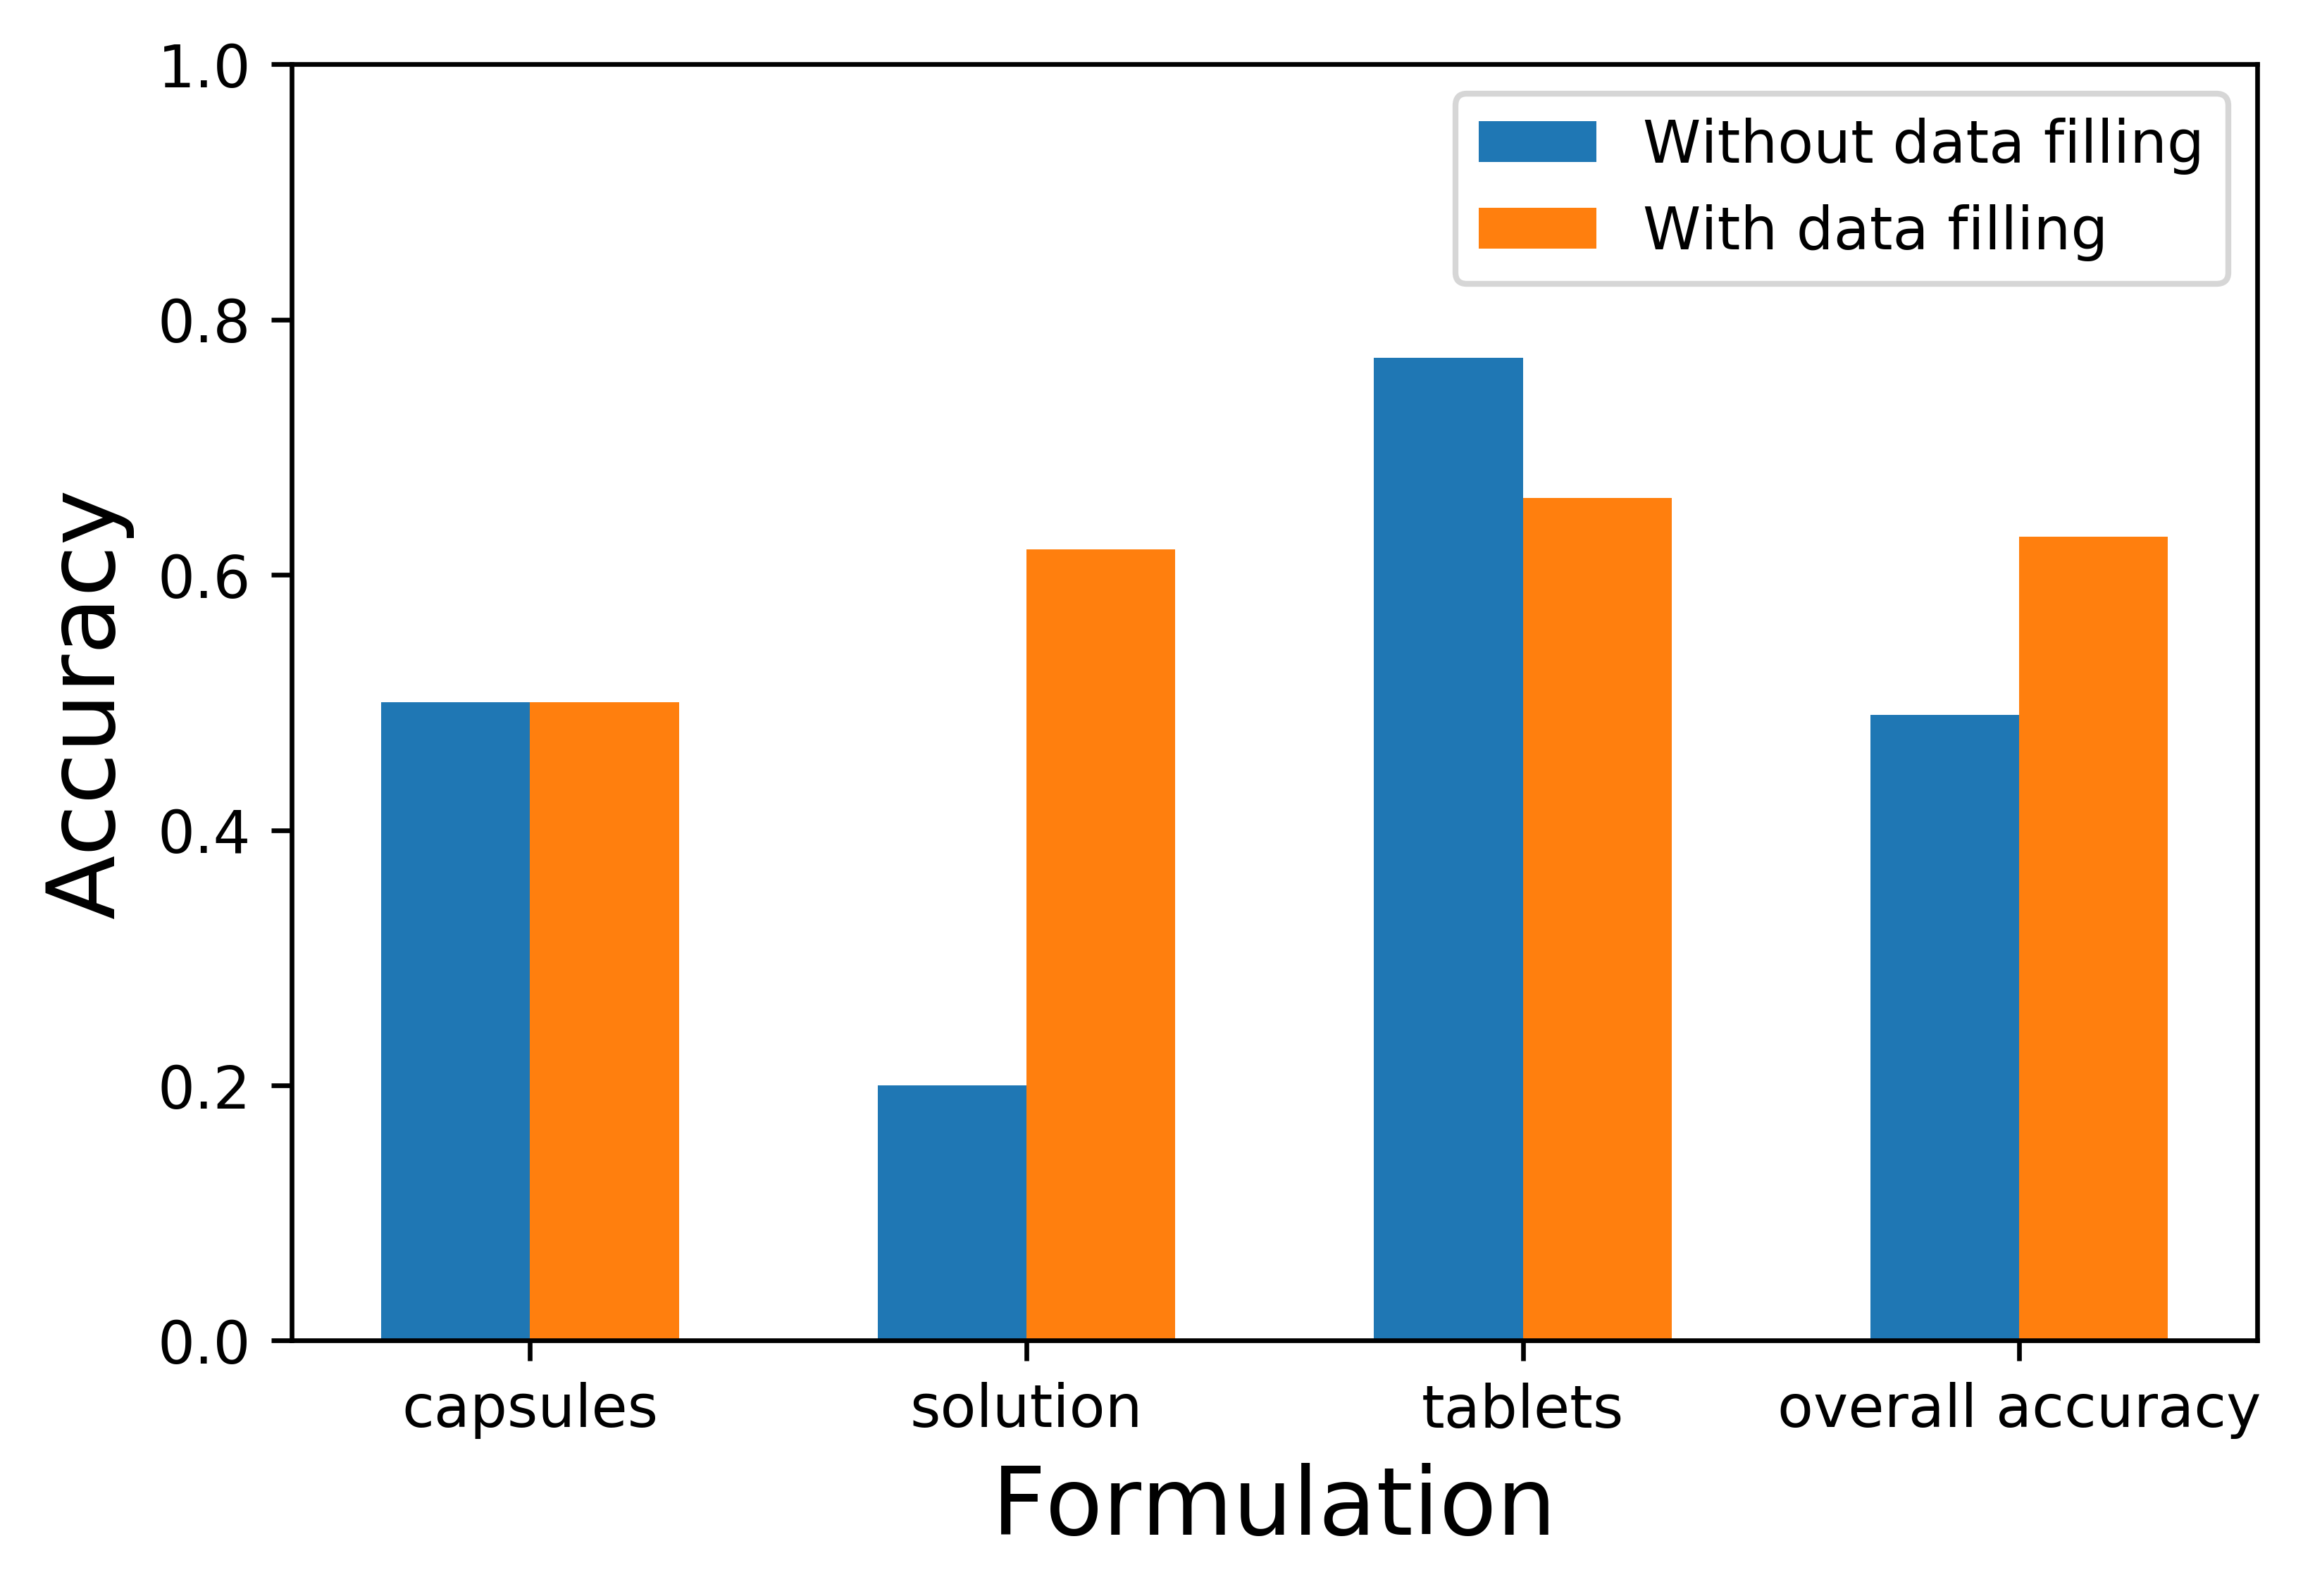

In [11]:
width = 0.3

plt.figure(figsize=(6, 4), dpi=600)

x = np.arange(len(original_accuracy))
plt.bar(x, original_accuracy, width=width, label='Without data filling')

x = x + width
plt.bar(x, after_accuracy, width=width, label='With data filling', )
plt.legend()

plt.title("",size=18)
plt.ylabel('Accuracy', size=16)
plt.ylim(0, 1)
plt.xlabel('Formulation', size=16)
plt.xticks(ticks=x-width/2, labels=name_list)